In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../dataset/IPL Ball-by-Ball0820.csv")

data.shape

(193468, 18)

In [14]:
matches = pd.read_csv("../dataset/IPL_Matches0820.csv")
matches.shape

(816, 17)

In [16]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [17]:
data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [6]:
list(data.columns)

['id',
 'inning',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'non_boundary',
 'is_wicket',
 'dismissal_kind',
 'player_dismissed',
 'fielder',
 'extras_type',
 'batting_team',
 'bowling_team']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [10]:
numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64']]
print(f"Number of numeric cols: {len(numeric_cols)}")
print(numeric_cols)

Number of numeric cols: 9
['id', 'inning', 'over', 'ball', 'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket']


In [12]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']
print(f"Number of category cols: {len(cat_cols)}")
print(cat_cols)

Number of category cols: 9
['batsman', 'non_striker', 'bowler', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type', 'batting_team', 'bowling_team']


In [21]:
data.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

<Figure size 1440x720 with 0 Axes>

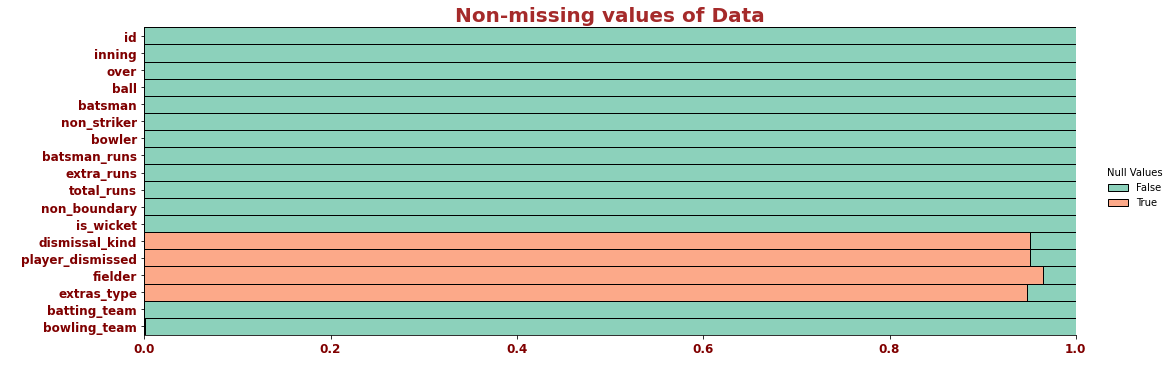

In [30]:
plt.figure(figsize=(20,10))

sns.displot(
    data= data.isnull().melt(value_name='Null Values'),
    y = "variable",
    hue="Null Values",
    multiple="fill",
    aspect=3,
    palette="Set2"
)
plt.title('Non-missing values of Data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');
plt.show()

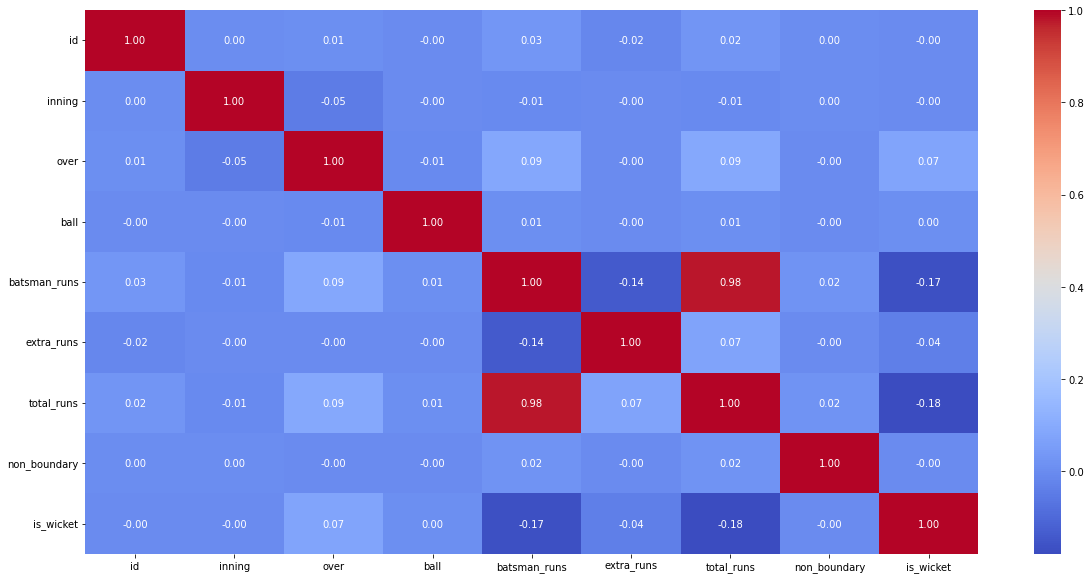

In [33]:
corr = data.corr()

plt.figure(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

Run by Batsman

In [34]:
most_run = data.groupby(['batsman'])['total_runs'].sum().sort_values(ascending=False).reset_index()
most_run.head(10)

,batsman,total_runs
0,V Kohli,6081
1,SK Raina,5604
2,DA Warner,5522
3,S Dhawan,5452
4,RG Sharma,5394
5,CH Gayle,5103
6,AB de Villiers,5016
7,RV Uthappa,4878
8,MS Dhoni,4855
9,G Gambhir,4479


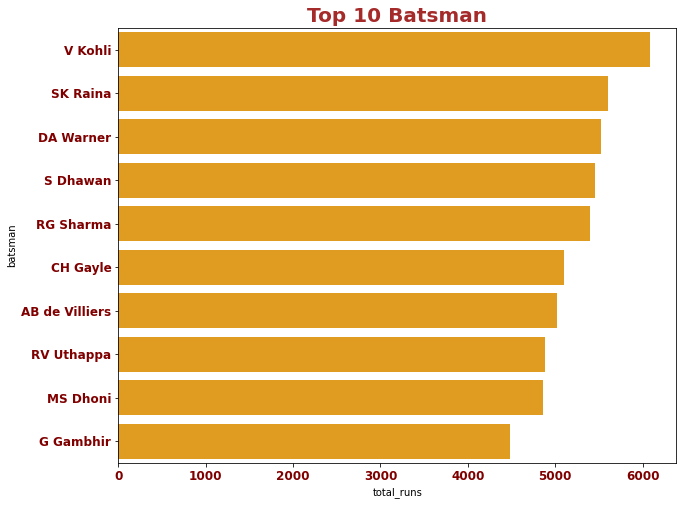

In [51]:
plt.figure(figsize=(10,8))
sns.barplot(x=most_run['total_runs'][:10], y=most_run['batsman'][:10], color='orange')
plt.title('Top 10 Batsman', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');
plt.show()

In [47]:
wickets_bowler = data.groupby(['bowler'])['is_wicket'].sum().sort_values(ascending=False).reset_index()
wickets_bowler.head(10)

,bowler,is_wicket
0,SL Malinga,188
1,DJ Bravo,175
2,A Mishra,169
3,PP Chawla,164
4,Harbhajan Singh,161
5,R Ashwin,153
6,B Kumar,146
7,SP Narine,143
8,UT Yadav,137
9,R Vinay Kumar,127


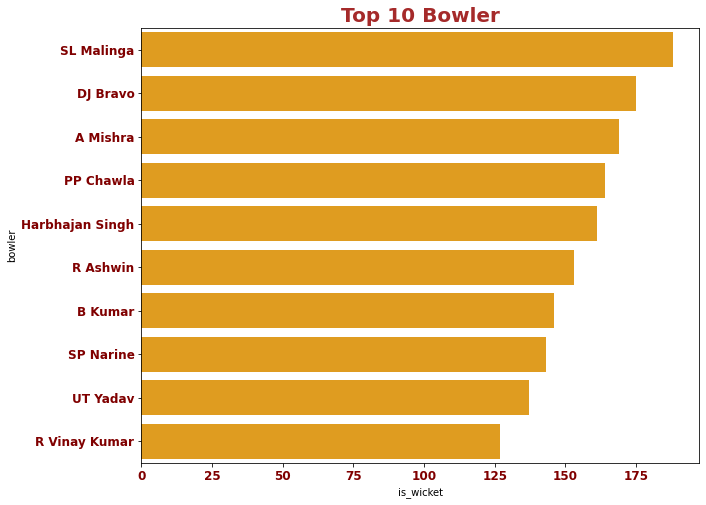

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(x=wickets_bowler['is_wicket'][:10], y=wickets_bowler['bowler'][:10], color='orange')
plt.title('Top 10 Bowler', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');
plt.show()

In [52]:
data.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [66]:
extra_run_by_bowler = data.groupby(['bowler'])['extra_runs'].sum().sort_values(ascending=False).reset_index()

extra_run_by_bowler.head(10)

,bowler,extra_runs
0,SL Malinga,293
1,P Kumar,236
2,UT Yadav,226
3,DJ Bravo,210
4,B Kumar,201
5,I Sharma,196
6,RP Singh,181
7,DW Steyn,177
8,R Ashwin,175
9,SR Watson,171


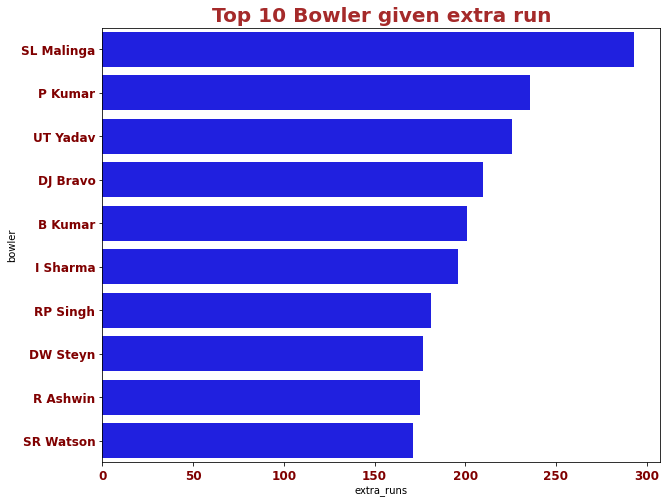

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x=extra_run_by_bowler['extra_runs'][:10], y=extra_run_by_bowler['bowler'][:10], color='blue')
plt.title('Top 10 Bowler given extra run', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');
plt.show()

In [71]:
bowler_data = wickets_bowler.merge(extra_run_by_bowler, on='bowler')
bowler_data.head()

,bowler,is_wicket,extra_runs
0,SL Malinga,188,293
1,DJ Bravo,175,210
2,A Mishra,169,125
3,PP Chawla,164,134
4,Harbhajan Singh,161,170


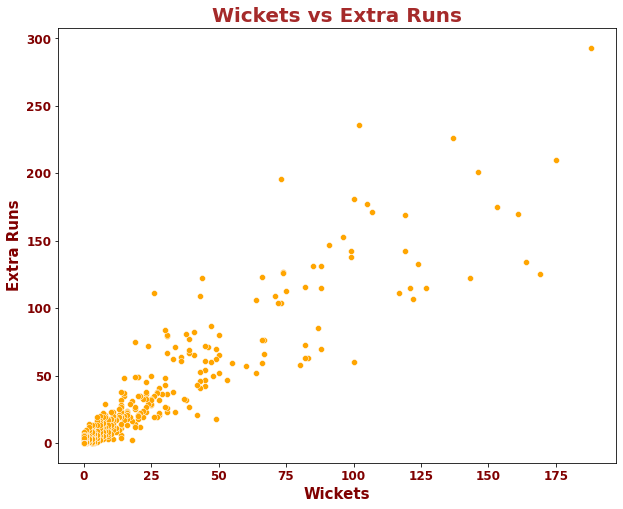

In [74]:
plt.figure(figsize=(10,8))

sns.scatterplot(x='is_wicket', y='extra_runs', data=bowler_data, color='orange')
plt.title('Wickets vs Extra Runs', weight = 'bold', size = 20, color = 'brown')
plt.xlabel('Wickets', size = 15, weight = 'bold', color = 'maroon')
plt.ylabel('Extra Runs', size = 15, weight = 'bold', color = 'maroon')
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');
plt.show()

<Figure size 1080x720 with 0 Axes>

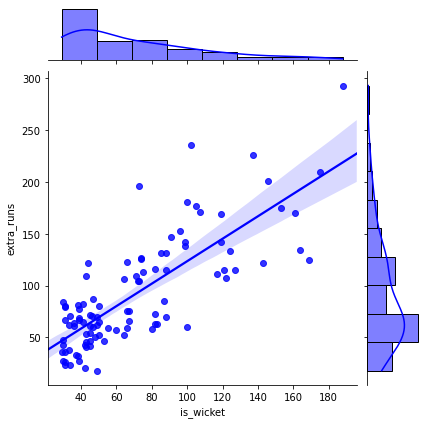

In [85]:
plt.figure(figsize=(15,10))
sns.jointplot(
    x='is_wicket', 
    y='extra_runs', 
    data=bowler_data[:100],
    kind='reg',
    truncate=False, 
    color='blue'
    )
# plt.title('Wickets vs Extra Runs joint plot', weight = 'bold', size = 10, color = 'brown')
plt.xlabel('Wickets', size = 15, weight = 'bold', color = 'maroon')
plt.ylabel('Extra Runs', size = 15, weight = 'bold', color = 'maroon')
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');
plt.show()